In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.6 MB 8.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.6 MB 9.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.6 MB 9.1 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.6 MB 5.5 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.6 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.6 MB 7.6 MB/s eta 0:00:01
   ------------------------------------- -- 11.8/12.6 MB 8.3 MB/s


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
customers_path = './data/Customers.csv'
products_path = './data/Products.csv'
transactions_path = './data/Transactions.csv'

In [7]:
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

In [8]:
print("Customers Dataset")
print(customers.info())
print("\nProducts Dataset")
print(products.info())
print("\nTransactions Dataset")
print(transactions.info())

Customers Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           No

In [9]:
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [11]:
customers.drop_duplicates(subset='CustomerID', inplace=True)
products.drop_duplicates(subset='ProductID', inplace=True)
transactions.drop_duplicates(subset='TransactionID', inplace=True)

In [12]:
transactions['CalculatedValue'] = transactions['Quantity'] * transactions['Price']
if not all(transactions['CalculatedValue'] == transactions['TotalValue']):
    print("Warning: Discrepancies found in TotalValue calculation.")

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

print("\nMerged Data Sample:")
print(merged_data.head())


Merged Data Sample:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x  CalculatedValue     CustomerName         Region  \
0      300.68   300.68           300.68   Andrea Jenkins         Europe   
1      300.68   300.68           300.68  Brittany Harvey           Asia   
2      300.68   300.68           300.68  Kathryn Stevens         Europe   
3      601.36   300.68           601.36  Travis Campbell  South America   
4      902.04   300.68           902.04    Timothy Perez         Europe   

  SignupDate                      ProductName     Category  Price_y  
0 2022-12-03  ComfortLiving Bluetooth

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

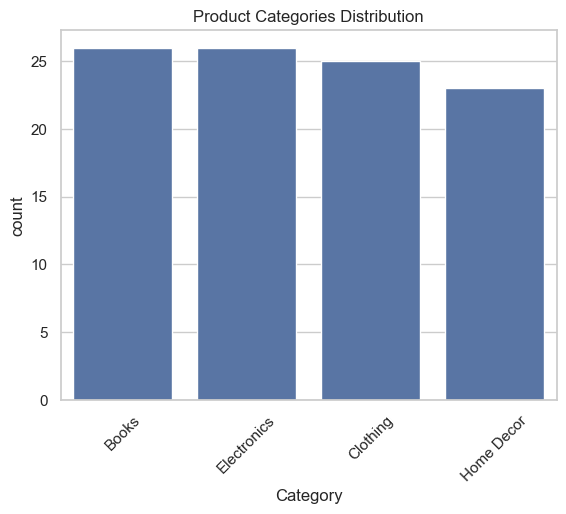

In [14]:
sns.countplot(data=products, x='Category', order=products['Category'].value_counts().index)
plt.title("Product Categories Distribution")
plt.xticks(rotation=45)
plt.show()

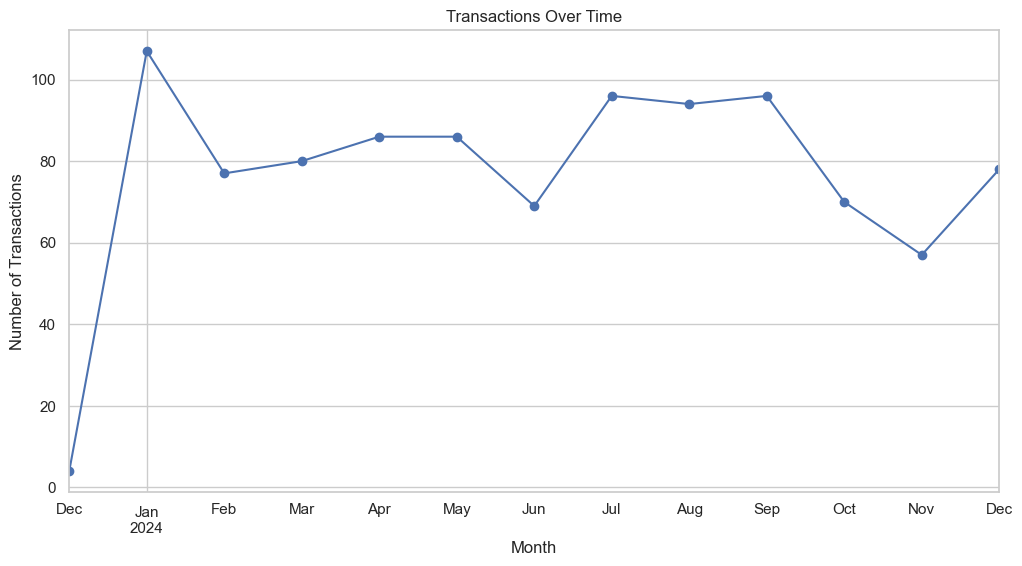

In [15]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('TransactionMonth').size()

monthly_transactions.plot(kind='line', marker='o', figsize=(12, 6), title="Transactions Over Time")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.show()

In [17]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Category:\n", category_revenue)

Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [18]:
regional_analysis = merged_data.groupby('Region').agg({'TotalValue': 'sum', 'TransactionID': 'count'})
regional_analysis['AvgOrderValue'] = regional_analysis['TotalValue'] / regional_analysis['TransactionID']
print("Regional Customer Behavior:\n", regional_analysis)

Regional Customer Behavior:
                TotalValue  TransactionID  AvgOrderValue
Region                                                 
Asia            152074.97            218     697.591606
Europe          166254.63            234     710.489872
North America   152313.40            244     624.235246
South America   219352.56            304     721.554474


In [19]:
signup_analysis = customers.groupby(customers['SignupDate'].dt.year).size()
print("Customer Signup Analysis:\n", signup_analysis)

Customer Signup Analysis:
 SignupDate
2022    64
2023    57
2024    79
dtype: int64


In [20]:
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.month)['TotalValue'].sum()
print("Monthly Sales Trends:\n", monthly_sales)

Monthly Sales Trends:
 TransactionDate
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


In [21]:
top_products = merged_data.groupby('ProductName').agg({'Quantity': 'sum', 'TotalValue': 'sum'})
top_products = top_products.sort_values(by='TotalValue', ascending=False).head(10)
print("Top Products by Revenue:\n", top_products)

Top Products by Revenue:
                          Quantity  TotalValue
ProductName                                  
ActiveWear Smartwatch         100    39096.97
SoundWave Headphones           97    25211.64
SoundWave Novel                58    24507.90
ActiveWear Jacket              76    22712.56
ActiveWear Rug                 79    22314.43
TechPro Headphones             45    19513.80
BookWorld Cookbook             48    19221.99
BookWorld Sweater              47    18743.79
TechPro Textbook               62    18267.96
ActiveWear Cookware Set        51    18083.73
